### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
#Load the file and display top 3 rows
dengue_feature = pd.read_csv("D:\MS - BAIS\Spring 2020\DSP\Assignment\dengue_features_train.csv")
dengue_feature.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4/30/1990,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5/7/1990,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,5/14/1990,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


In [3]:
#Rename and merge the two files. Fill the nulls using flood fill
dengue_feature.columns = dengue_feature.columns.str.replace('station','stn')
dengue_feature.columns = dengue_feature.columns.str.replace('reanalysis','re_an')
dengue_feature.columns = dengue_feature.columns.str.replace('humidity','hd')
dengue_feature.columns = dengue_feature.columns.str.replace('precipitation','prec')
dengue_feature.info()
dengue_feature.year = dengue_feature.year.astype('category')
dengue_feature.dtypes
dengue_labels = pd.read_csv("D:\MS - BAIS\Spring 2020\DSP\Assignment\dengue_labels_train.csv")
merged = pd.merge(dengue_feature,dengue_labels, on = ['city','year','weekofyear'])
merged = merged.fillna(method='ffill')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                          1456 non-null object
year                          1456 non-null int64
weekofyear                    1456 non-null int64
week_start_date               1456 non-null object
ndvi_ne                       1262 non-null float64
ndvi_nw                       1404 non-null float64
ndvi_se                       1434 non-null float64
ndvi_sw                       1434 non-null float64
prec_amt_mm                   1443 non-null float64
re_an_air_temp_k              1446 non-null float64
re_an_avg_temp_k              1446 non-null float64
re_an_dew_point_temp_k        1446 non-null float64
re_an_max_air_temp_k          1446 non-null float64
re_an_min_air_temp_k          1446 non-null float64
re_an_precip_amt_kg_per_m2    1446 non-null float64
re_an_relative_hd_percent     1446 non-null float64
re_an_sat_precip_amt_mm       1443 non-null float64
re_an_specific_

In [4]:
dengue_feature.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,sj,1990,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,6/4/1990,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,6/11/1990,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,6/18/1990,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,6/25/1990,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,7/2/1990,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [5]:
merged.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
0,sj,1990,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,6/4/1990,0.196200,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,6/11/1990,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,6/18/1990,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,6/25/1990,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,7/2/1990,0.102450,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [6]:
dup = merged.copy()

In [7]:
#Convert city into categorical variable
dup['city'] = dup['city'].astype('category')

In [8]:
dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                          1456 non-null category
year                          1456 non-null int64
weekofyear                    1456 non-null int64
week_start_date               1456 non-null object
ndvi_ne                       1456 non-null float64
ndvi_nw                       1456 non-null float64
ndvi_se                       1456 non-null float64
ndvi_sw                       1456 non-null float64
prec_amt_mm                   1456 non-null float64
re_an_air_temp_k              1456 non-null float64
re_an_avg_temp_k              1456 non-null float64
re_an_dew_point_temp_k        1456 non-null float64
re_an_max_air_temp_k          1456 non-null float64
re_an_min_air_temp_k          1456 non-null float64
re_an_precip_amt_kg_per_m2    1456 non-null float64
re_an_relative_hd_percent     1456 non-null float64
re_an_sat_precip_amt_mm       1456 non-null float64
re_an_specifi

In [9]:
#Store the target variable total_cases in y 
y = dup[['total_cases']]

In [10]:
#Store all the other variables except target data in X
X = dup[dup.columns.difference(['total_cases'])]

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                          1456 non-null category
ndvi_ne                       1456 non-null float64
ndvi_nw                       1456 non-null float64
ndvi_se                       1456 non-null float64
ndvi_sw                       1456 non-null float64
prec_amt_mm                   1456 non-null float64
re_an_air_temp_k              1456 non-null float64
re_an_avg_temp_k              1456 non-null float64
re_an_dew_point_temp_k        1456 non-null float64
re_an_max_air_temp_k          1456 non-null float64
re_an_min_air_temp_k          1456 non-null float64
re_an_precip_amt_kg_per_m2    1456 non-null float64
re_an_relative_hd_percent     1456 non-null float64
re_an_sat_precip_amt_mm       1456 non-null float64
re_an_specific_hd_g_per_kg    1456 non-null float64
re_an_tdtr_k                  1456 non-null float64
stn_avg_temp_c                1456 non-null float64
stn_diur

In [12]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 1 columns):
total_cases    1456 non-null int64
dtypes: int64(1)
memory usage: 22.8 KB


### Make an 80-20 stratified split based on the target data

In [13]:
#Creating a stratified 80:20 split based on the City
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = X["city"], test_size = 0.2)

### Preprocess the data (Encode the categorical features and Standardize the numerical features

In [16]:
#Storing all the categorical and numerical variables in two separate lists for encoding & standardizing respectively
cols_to_encode = ["city", "year"]
cols_to_scale = ["weekofyear","ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw", "prec_amt_mm", "re_an_air_temp_k",
           "re_an_avg_temp_k",
           "re_an_dew_point_temp_k",
           "re_an_max_air_temp_k",
           "re_an_min_air_temp_k",
           "re_an_precip_amt_kg_per_m2",
           "re_an_relative_hd_percent",
           "re_an_sat_precip_amt_mm",
           "re_an_specific_hd_g_per_kg",
           "re_an_tdtr_k",
           "stn_avg_temp_c",
           "stn_diur_temp_rng_c",
           "stn_max_temp_c",
           "stn_min_temp_c",
           "stn_precip_mm"]

scale = StandardScaler()
ohe = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
encoded_train = ohe.fit_transform(X_train[cols_to_encode])
encoded_test = ohe.fit_transform(X_test[cols_to_encode])
scaled_train  = scale.fit_transform(X_train[cols_to_scale])
scaled_test  = scale.fit_transform(X_test[cols_to_scale])

# Concatenate (Column-Bind) Processed Columns Back Together
X_train_new = np.concatenate([encoded_train, scaled_train], axis=1)
X_test_new = np.concatenate([encoded_test, scaled_test], axis=1)

### Build a stochastic gradient descent regressor, train the model

In [17]:
#Build the SGD Regressor model and train it
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_train_new, y_train)

C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

### Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.

In [18]:
#Predict the target data using the trained model
y_pred = clf.predict(X_test_new)

In [19]:
#Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mae

19.89140322200942

The usual evaluation metrics for a regression model are MSE, RMSE and MAE. The MSE was chosen as an evaluation metric for the model as the MSE is very useful when we want to recognize the distinction between different models of the same data. It is not very sensitive to outliers like MSE or RMSE. 

### List the hyper-parameters that can be tuned in SGD. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy. 

In [20]:
#SGD with tuned hyper-parameter
clf1 = SGDRegressor(loss="huber", 
                    max_iter=1000, #Maximum number of iterations
                    random_state=42, 
                    tol=1e-3, #Learning rate
                    penalty=None) #Penalty 
clf1.fit(X_train_new, y_train)

C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='huber', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [21]:
y_pred1 = clf1.predict(X_test_new)

In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred1)
mae

16.828251798698545

The hyperparameters that can be used to tune in SGD are max_iter, loss, penalty, tol. The parameters are chosen with values as such because it seem to bring the MAE value down. The learning rate along with the maximum number of iterations didn't seem to have a big effect intially. After introducing the penalty of None along with random_state the MAE value seem to drop from 19.89 to 16.83 which means the model accuracy has improved further as the value of absolure error goes down.

### Plot Learning curve and provide insights

In [23]:
#Plot the learning curve
train_errors, test_errors = [], []
for m in range(1, len(X_train_new)):
    clf1.fit(X_train_new[:m], y_train[:m])
    y_train_pred = clf1.predict(X_train_new[:m])
    y_test_pred = clf1.predict(X_test_new)
    train_errors.append(mean_absolute_error(y_train[:m], y_train_pred))
    test_errors.append(mean_absolute_error(y_test, y_test_pred))

C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvig9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

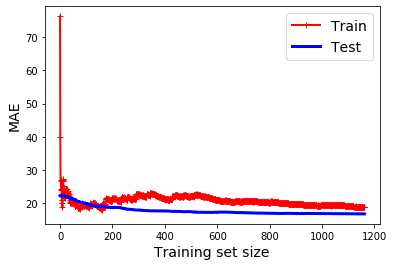

In [24]:
plt.plot(train_errors, "r+-", linewidth=2, label = "Train")
plt.plot(test_errors, "b-", linewidth=3, label = "Test")
plt.legend(loc="upper right", fontsize=14) 
plt.xlabel("Training set size", fontsize=14)
plt.ylabel("MAE", fontsize=14)
plt.show()

The Learning curve plot suggests the model might have too small of a test set relative to the training set. It also seems to be slightly on the overfitting side. 

### Create a submission file which has predictions for both cities in the submission format prescribed by the contest at the link

In [25]:
#Create the submission file in CSV format
output =  {"city" : X_test["city"],
           "year" : X_test["year"],
           "weekofyear" : X_test["weekofyear"],
           "pred" : y_pred1}

df = pd.DataFrame(output, columns= ['city', 'year','weekofyear','pred'])
df.to_csv (r'submission_format.csv', index = False, header=True)
df

,city,year,weekofyear,pred
302,sj,1996,8,9.956433
476,sj,1999,25,14.167619
250,sj,1995,7,9.418645
1295,iq,2007,22,-0.292803
201,sj,1994,10,10.243108
...,...,...,...,...
306,sj,1996,12,9.347930
1178,iq,2005,8,4.463498
1153,iq,2004,36,2.574426
694,sj,2003,36,15.462081
